In [1]:
import pandas as pd
import numpy  as np

In [2]:
from main import Problem3Experiment
df = Problem3Experiment()



FACES Dataset ---

10% of faces - binary PERCEPTRON:
train_time=0.56ms, time_std=0.02  avg_accuracy=64.67% std=10.87

10% of faces - binary NAIVE BAYES:
train_time=0.44ms, time_std=0.01  avg_accuracy=80.0% std=0.0

10% of faces - binary NEURAL NETWORK:
train_time=4.05ms, time_std=0.08  avg_accuracy=56.67% std=6.32



20% of faces - binary PERCEPTRON:
train_time=1.27ms, time_std=0.03  avg_accuracy=70.67% std=5.01

20% of faces - binary NAIVE BAYES:
train_time=1.03ms, time_std=0.03  avg_accuracy=86.67% std=0.0

20% of faces - binary NEURAL NETWORK:
train_time=7.46ms, time_std=0.04  avg_accuracy=58.67% std=11.13



30% of faces - binary PERCEPTRON:
train_time=1.66ms, time_std=0.06  avg_accuracy=58.44% std=3.89

30% of faces - binary NAIVE BAYES:
train_time=1.53ms, time_std=0.03  avg_accuracy=87.78% std=0.0

30% of faces - binary NEURAL NETWORK:
train_time=10.48ms, time_std=0.12  avg_accuracy=56.22% std=5.1



40% of faces - binary PERCEPTRON:
train_time=2.38ms, time_std=0.07  avg_accura

In [3]:
df.head()

,Dataset,Model,Percent,Trial,Accuracy,Time
0,0,0,10,0,73.333333,0.9648
1,0,0,10,1,70.000000,0.4498
2,0,0,10,2,53.333333,0.4440
3,0,0,10,3,76.666667,0.4531
4,0,0,10,4,50.000000,0.4902


In [4]:
ag = df.groupby(['Dataset', 'Model', 'Percent']).agg(
    
    acc_avg = pd.NamedAgg(column="Accuracy", aggfunc="mean"),
    
    acc_std = pd.NamedAgg(column="Accuracy", aggfunc="std"),
    
    time_avg = pd.NamedAgg(column="Time", aggfunc="mean"),
    
    time_std = pd.NamedAgg(column="Time", aggfunc="std")
    
).reset_index()

ag.head()


,Dataset,Model,Percent,acc_avg,acc_std,time_avg,time_std
0,0,0,10,64.666667,12.156388,0.56038,0.226805
1,0,0,20,70.666667,5.602579,1.26620,0.343222
2,0,0,30,58.444444,4.346135,1.65834,0.715430
3,0,0,40,67.333333,15.222881,2.37788,0.744062
4,0,0,50,79.066667,9.111653,2.54972,0.740908


In [5]:
face_df = ag.loc[ag["Dataset"] == 0].drop(['Dataset'], axis=1)
mnist_df = ag.loc[ag["Dataset"] == 1].drop(['Dataset'], axis=1)

In [6]:
bl = "tab:blue"
rd = "crimson"
gn = "green"

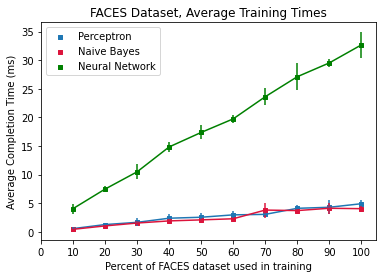

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(face_df.loc[face_df["Model"] == 0, 'Percent'], face_df.loc[face_df["Model"] == 0, 'time_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(face_df.loc[face_df["Model"] == 0, 'Percent'], 
             face_df.loc[face_df["Model"] == 0, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 0, 'time_std'], c=bl)

plt.scatter(face_df.loc[face_df["Model"] == 1, 'Percent'], face_df.loc[face_df["Model"] == 1, 'time_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(face_df.loc[face_df["Model"] == 1, 'Percent'], 
             face_df.loc[face_df["Model"] == 1, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 1, 'time_std'], c=rd)

plt.scatter(face_df.loc[face_df["Model"] == 2, 'Percent'], face_df.loc[face_df["Model"] == 2, 'time_avg'], s=10, c=gn, marker="s", label='Neural Network')
plt.errorbar(face_df.loc[face_df["Model"] == 2, 'Percent'], 
             face_df.loc[face_df["Model"] == 2, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 2, 'time_std'], c=gn)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(loc='upper left');
plt.title("FACES Dataset, Average Training Times")
plt.xlabel("Percent of FACES dataset used in training")
plt.ylabel("Average Completion Time (ms)")
plt.show()

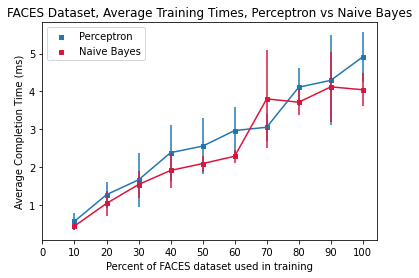

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()


plt.scatter(face_df.loc[face_df["Model"] == 0, 'Percent'], face_df.loc[face_df["Model"] == 0, 'time_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(face_df.loc[face_df["Model"] == 0, 'Percent'], 
             face_df.loc[face_df["Model"] == 0, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 0, 'time_std'], c=bl)

plt.scatter(face_df.loc[face_df["Model"] == 1, 'Percent'], face_df.loc[face_df["Model"] == 1, 'time_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(face_df.loc[face_df["Model"] == 1, 'Percent'], 
             face_df.loc[face_df["Model"] == 1, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 1, 'time_std'], c=rd)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(loc='upper left');
plt.title("FACES Dataset, Average Training Times, Perceptron vs Naive Bayes")
plt.xlabel("Percent of FACES dataset used in training")
plt.ylabel("Average Completion Time (ms)")
plt.show()

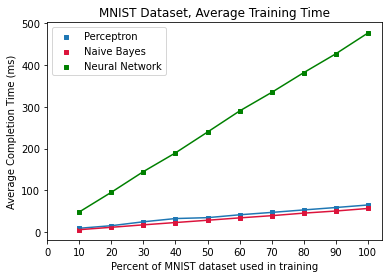

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], mnist_df.loc[mnist_df["Model"] == 0, 'time_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 0, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 0, 'time_std'], c=bl)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], mnist_df.loc[mnist_df["Model"] == 1, 'time_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 1, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 1, 'time_std'], c=rd)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 2, 'Percent'], mnist_df.loc[mnist_df["Model"] == 2, 'time_avg'], s=10, c=gn, marker="s", label='Neural Network')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 2, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 2, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 2, 'time_std'], c=gn)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(loc='upper left');
plt.title("MNIST Dataset, Average Training Time")
plt.xlabel("Percent of MNIST dataset used in training")
plt.ylabel("Average Completion Time (ms)")
plt.show()

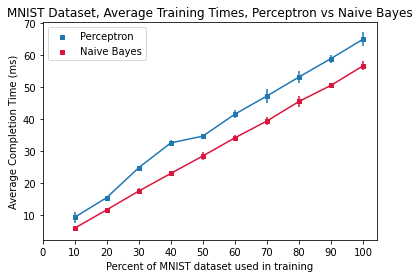

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()


plt.scatter(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], mnist_df.loc[mnist_df["Model"] == 0, 'time_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 0, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 0, 'time_std'], c=bl)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], mnist_df.loc[mnist_df["Model"] == 1, 'time_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 1, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 1, 'time_std'], c=rd)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(loc='upper left');
plt.title("MNIST Dataset, Average Training Times, Perceptron vs Naive Bayes")
plt.xlabel("Percent of MNIST dataset used in training")
plt.ylabel("Average Completion Time (ms)")
plt.show()

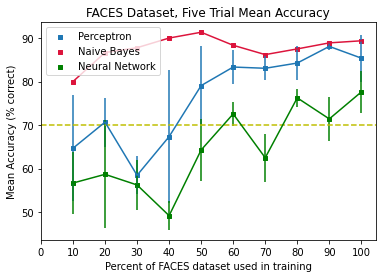

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(face_df.loc[face_df["Model"] == 0, 'Percent'], face_df.loc[face_df["Model"] == 0, 'acc_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(face_df.loc[face_df["Model"] == 0, 'Percent'], 
             face_df.loc[face_df["Model"] == 0, 'acc_avg'],
             yerr=face_df.loc[face_df["Model"] == 0, 'acc_std'], c=bl)

plt.scatter(face_df.loc[face_df["Model"] == 1, 'Percent'], face_df.loc[face_df["Model"] == 1, 'acc_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(face_df.loc[face_df["Model"] == 1, 'Percent'], 
             face_df.loc[face_df["Model"] == 1, 'acc_avg'],
             yerr=face_df.loc[face_df["Model"] == 1, 'acc_std'], c=rd)

plt.scatter(face_df.loc[face_df["Model"] == 2, 'Percent'], face_df.loc[face_df["Model"] == 2, 'acc_avg'], s=10, c=gn, marker="s", label='Neural Network')
plt.errorbar(face_df.loc[face_df["Model"] == 2, 'Percent'], 
             face_df.loc[face_df["Model"] == 2, 'acc_avg'],
             yerr=face_df.loc[face_df["Model"] == 2, 'acc_std'], c=gn)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.axhline(y = 70, color = 'y', linestyle = 'dashed')

plt.legend(loc='upper left');
plt.title("FACES Dataset, Five Trial Mean Accuracy")
plt.xlabel("Percent of FACES dataset used in training")
plt.ylabel("Mean Accuracy (% correct)")
plt.show()

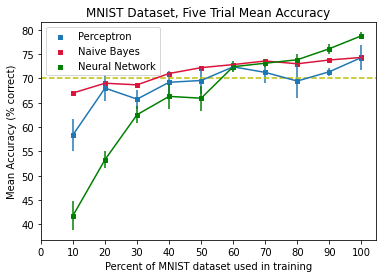

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], mnist_df.loc[mnist_df["Model"] == 0, 'acc_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 0, 'acc_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 0, 'acc_std'], c=bl)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], mnist_df.loc[mnist_df["Model"] == 1, 'acc_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 1, 'acc_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 1, 'acc_std'], c=rd)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 2, 'Percent'], mnist_df.loc[mnist_df["Model"] == 2, 'acc_avg'], s=10, c=gn, marker="s", label='Neural Network')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 2, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 2, 'acc_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 2, 'acc_std'], c=gn)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.axhline(y = 70, color = 'y', linestyle = 'dashed')

plt.legend(loc='upper left');
plt.title("MNIST Dataset, Five Trial Mean Accuracy")
plt.xlabel("Percent of MNIST dataset used in training")
plt.ylabel("Mean Accuracy (% correct)")
plt.show()